## Homework 5
### Problem 1

In [31]:
# part a
import numpy as np

# Text file data converted to integer data type
test_data = np.loadtxt("knnClassify3CTest.txt", dtype=float)
train_data = np.loadtxt("knnClassify3CTrain.txt", dtype=float)
X_train = train_data[:, 0:2]
y_train =train_data[:,2]

X_test = test_data[:,0:2]
y_test =test_data[:,2]

In [32]:
# part b
 
#Euclidean Distance
def eucledian(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))
 
#Function to calculate KNN
def knnClassifier(X_train, y_train, X_test, K): #predict(x_train, y , x_input, k)
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for i in X_test: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in X_train: 
            distances = eucledian(j , i) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:K] 
         
        #Labels of the K datapoints from above
        labels = y_train[dist]
         
        #finding most common point so it can be classified
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [3]:
# part b
from scipy.stats import mode

#Euclidean Distance
def euclidean_distance(x,X_train):
    return np.sqrt(np.sum( np.square(x-X_train)))#return np.sqrt(np.sum((p1-p2)**2))

# calculate all the euclidean distances between current test example x and training set X_train
def find_neighbors(x, X_train, y_train, K):
        size = X_train.shape
        distances = np.zeros(len(X_train))
        #distances = distances.reshape(-1,1)
        for i in range(len(X_train)) :
            dist = euclidean_distance(x, X_train[i])
            distances[i] = dist
          
        # sort Y_train according to euclidean_distance_array and store into Y_train_sorted
        idxs = distances.argsort(axis=0)
        y_train_sorted = y_train[idxs]
          
        return y_train_sorted[:K]
 
#Function to calculate KNN
def knnClassifier(X_train, y_train, X_test, K): #predict(x_train, y , x_input, k)
    y_predict = np.zeros(len(X_test))
    for i in range(len(X_test)) :  
            x = X_test[i]
            # find the K nearest neighbors from current test example
            neighbors = np.zeros(K)
            neighbors = find_neighbors(x,X_train,y_train,K)
            # most frequent class in K neighbors
            y_predict[i] = mode(neighbors)[0][0]         
    return y_predict


In [4]:
# part c

K_values = [1, 3, 5, 10, 15, 25, 50, 80]
accuracy_values = []

for k in K_values:
    y_pred = knnClassifier(X_train, y_train, X_test, k)
    accuracy = sum(y_pred == y_test) / len(y_test)
    accuracy_values.append(accuracy)

Text(0.5, 1.0, 'Accurcies of KNN with Differnet Values of K')

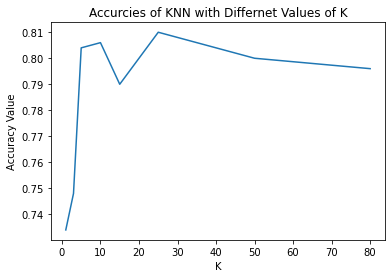

In [10]:
import matplotlib.pyplot as plt
K_values = np.array(K_values)
K_accuracy_valuesvalues = np.array(accuracy_values)

plt.plot(K_values, accuracy_values)
plt.xlabel("K")
plt.ylabel("Accuracy Value")
plt.title("Accurcies of KNN with Differnet Values of K")

/Users/victoria/opt/anaconda3/envs/cse217a/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/Users/victoria/opt/anaconda3/envs/cse217a/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/Users/victoria/opt/anaconda3/envs/cse217a/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions 

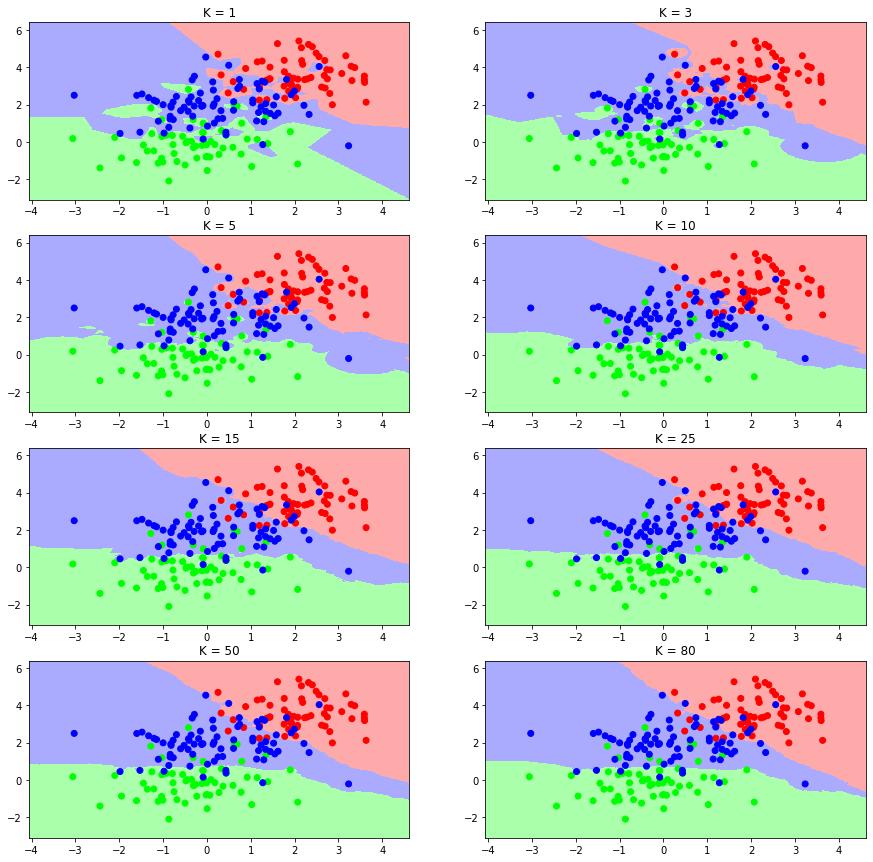

In [26]:
# plot decision boundary together with the training instances

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

x_min = X_train.min
x_max = X_train.max
y_min = y_train.min
y_max = y_train.max

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

w = 0
l = 0

fig, axs = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

for k in K_values:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k, weights='distance')
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    axs[w,l].pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    axs[w,l].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
    title = "K = " + str(k)
    axs[w,l].set_title(title)
    if(l == 1):
        l = 0
        w = w+1
    else:
        l = l+1

### Part C Questions:

Question: What can you find from these plots? Are the models with small K simpler or more complex? Do they have high bias or high variance?

Answer: We can see that as we initally increase the value of K, the model gets more accurate, then as you get a little big more complex, this decreses then increases again. Then, we begin a steady decrease as we go from large values like 25 to even larger like 50 and 80. The models with a small K have a larger varaince but less bias while the larger values of K are simplers with less variance but more biased.


In [28]:
# part d
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# hyperparameters that we want to tune
n_neighbors = list(range(1,80))
p=[1,2]
# make the hyperparametsr a dictioanry
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

# make a new KNN to tune the hyperparameters
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(X_train,y_train)

print('Best K value:', best_model.best_estimator_.get_params()['n_neighbors'])

Best K value: 71


In [42]:
K_values = np.arange(1, 80, 1)
accuracy_values = []

for k in K_values:
    knn_loop = KNeighborsClassifier(k)
    knn_loop.fit(X_train, y_train)
    accuracy = knn_loop.score(X_test, y_test)
    accuracy_values.append(accuracy)

Text(0.5, 1.0, 'Accurcies of KNN with Differnet Values of K')

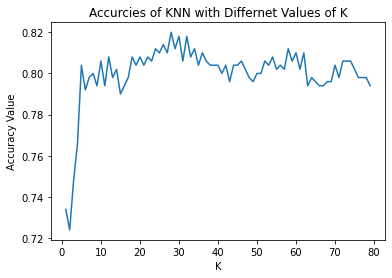

In [43]:
#Plot validation accuracy curve with regard to K 
import matplotlib.pyplot as plt
K_accuracy_valuesvalues = np.array(accuracy_values)

plt.plot(K_values, accuracy_values)
plt.xlabel("K")
plt.ylabel("Accuracy Value")
plt.title("Accurcies of KNN with Differnet Values of K")

## Problem 2

In [60]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

telescope_data = pd.read_csv("telescope_data.csv")

class_data = telescope_data[telescope_data.columns[-1]]

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(class_data)
classes = list(label_encoder.classes_)
classes_encoded = label_encoder.transform(class_data)

X = telescope_data.iloc[:, 1:11]
X = preprocessing.scale(X) # gride search was taking too long so this makes it go faster

# Split the dataset into training and test dataset. 
X_train, X_test, y_train, y_test = train_test_split(X, classes_encoded, test_size=0.3, random_state=445)


In [56]:
# part b
# Use GridSearchCV to tune hyperparameters, for example, number of trees in the forest and the maximum depth of the tree
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import HalvingGridSearchCV

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# hyperparemetesr
n_estimators = list(range(10,10000,10))
max_depth = list(range(10,200,10))
hyperparameters = dict(n_estimators=n_estimators, max_depth = max_depth)

random_forest_2 = RandomForestClassifier()
grid_search = GridSearchCV(random_forest_2, hyperparameters, cv=3)

grid_search.fit(X_train, y_train)

print('Best number of trees in the forest value:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max depth of a tree value:', best_model.best_estimator_.get_params()['max_depth'])


KeyboardInterrupt: 

The above code takes much too long for me to run but this is the code that should be executed. It takes so long since it brute force goes it's way through all the data so since we have such a large dataset it will take a very long time

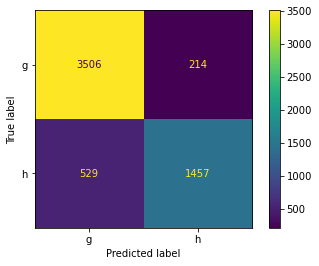

Accuracy: 0.8697861899754644
Precision: 0.8719329742669061


In [65]:
# part c
# Use test dataset to evaluate your model with a confusion matrix
from sklearn import metrics

y_pred = random_forest.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['g', 'h'])# note: g = 0 and h = 1

cm_display.plot()
plt.show()

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)

print("Accuracy: " + str(accuracy))
print("Precision: "+str(precision))